In [32]:
import pandas as pd
import visuals as vs
%config InlineBackend.figure_format='retina'

In [33]:
data = pd.read_csv('DiabetesClassificationDataset2022.csv')
data.head()

,encounter_id,hospital_id,gender,ethnicity,age,elective_surgery,height,weight,bmi,readmission_status,...,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
0,214826,118,M,Caucasian,68.0,0,180.3,73.9,22.732803,0,...,40.0,0,0,0,0,0,0,0,0,1
1,276985,118,F,Caucasian,25.0,0,172.7,95.3,31.952749,0,...,68.0,0,0,0,0,0,0,0,0,0
2,262220,118,F,Caucasian,81.0,1,165.1,61.7,22.635548,0,...,60.0,0,0,0,0,0,0,0,1,0
3,201746,33,M,Caucasian,19.0,0,188.0,NaN,NaN,0,...,103.0,0,0,0,0,0,0,0,0,0
4,246060,81,F,Caucasian,77.0,0,160.0,70.2,27.421875,0,...,46.0,0,0,0,0,0,0,0,1,1


In [34]:
data.shape

(79159, 88)

In [35]:
data.describe()

,encounter_id,hospital_id,age,elective_surgery,height,weight,bmi,readmission_status,h1_temp_max,h1_temp_min,...,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
count,79159.000000,79159.000000,76317.000000,79159.000000,77978.000000,77086.000000,76468.000000,79159.0,61223.000000,61223.000000,...,78931.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000
mean,212863.726740,106.188620,62.452389,0.189404,169.565316,85.114552,29.600786,0.0,36.721315,36.612966,...,87.278128,0.000834,0.016713,0.013744,0.025379,0.007327,0.004080,0.020781,0.332243,0.355639
std,38113.816591,63.776527,16.446715,0.391831,10.835017,25.465505,8.487987,0.0,0.771686,0.795767,...,42.058748,0.028863,0.128195,0.116429,0.157275,0.085284,0.063748,0.142651,0.471020,0.478709
min,147001.000000,1.000000,0.000000,0.000000,137.200000,38.600000,14.844926,0.0,33.400000,32.900000,...,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,179772.000000,49.000000,53.000000,0.000000,162.500000,67.700000,23.875433,0.0,36.400000,36.300000,...,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,212864.000000,112.000000,65.000000,0.000000,170.000000,81.600000,28.029903,0.0,36.700000,36.700000,...,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,245812.000000,165.000000,75.000000,0.000000,177.800000,98.400000,33.420162,0.0,37.100000,37.000000,...,124.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,278997.000000,204.000000,89.000000,1.000000,195.590000,186.000000,67.814990,0.0,39.500000,39.300000,...,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79159 entries, 0 to 79158
Data columns (total 88 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   encounter_id                 79159 non-null  int64  
 1   hospital_id                  79159 non-null  int64  
 2   gender                       79129 non-null  object 
 3   ethnicity                    78198 non-null  object 
 4   age                          76317 non-null  float64
 5   elective_surgery             79159 non-null  int64  
 6   height                       77978 non-null  float64
 7   weight                       77086 non-null  float64
 8   bmi                          76468 non-null  float64
 9   readmission_status           79159 non-null  int64  
 10  icu_type                     79159 non-null  object 
 11  h1_temp_max                  61223 non-null  float64
 12  h1_temp_min                  61223 non-null  float64
 13  d1_albumin_max  

In [37]:
columns_to_drop_1 = list(data.isnull().sum().sort_values(ascending=False).head(45).index.values)

In [38]:
data.drop(labels=columns_to_drop_1, axis=1, inplace=True)

In [39]:
data.shape

(79159, 43)

In [40]:
data.dropna(inplace=True)

In [41]:
data.shape

(38582, 43)

In [42]:
data.isnull().sum().sum()

0

In [43]:
def get_numeric_features(df: pd.DataFrame) -> list:
    return list(df.select_dtypes(include=['float64']).columns)

In [44]:
numeric_features_list = get_numeric_features(data)
numeric_features_list

['age',
 'height',
 'weight',
 'bmi',
 'h1_temp_max',
 'd1_bun_max',
 'd1_bun_min',
 'd1_glucose_min',
 'd1_hco3_max',
 'd1_hco3_min',
 'd1_platelets_max',
 'd1_platelets_min',
 'd1_potassium_max',
 'd1_potassium_min',
 'd1_sodium_max',
 'd1_sodium_min',
 'd1_wbc_max',
 'd1_wbc_min',
 'wbc_apache',
 'd1_heartrate_max',
 'heart_rate_apache',
 'gcs_motor_apache',
 'gcs_eyes_apache',
 'creatinine_apache',
 'h1_spo2_max',
 'map_apache']

In [45]:
data[numeric_features_list].corr()

,age,height,weight,bmi,h1_temp_max,d1_bun_max,d1_bun_min,d1_glucose_min,d1_hco3_max,d1_hco3_min,...,d1_wbc_max,d1_wbc_min,wbc_apache,d1_heartrate_max,heart_rate_apache,gcs_motor_apache,gcs_eyes_apache,creatinine_apache,h1_spo2_max,map_apache
age,1.000000,-0.110445,-0.118124,-0.077850,-0.076784,0.212760,0.243537,0.048010,0.071281,0.111475,...,-0.016087,-0.013547,-0.017358,-0.161671,-0.172912,0.042986,0.042392,0.044161,-0.054484,-0.024464
height,-0.110445,1.000000,0.369052,-0.076280,0.003766,0.023279,0.024016,0.021568,0.023172,0.020377,...,-0.009136,-0.011634,-0.010446,-0.020964,-0.018949,-0.014758,-0.008693,0.049937,-0.022951,0.028812
weight,-0.118124,0.369052,1.000000,0.881346,0.039066,0.074894,0.082692,0.140575,0.096919,0.099935,...,0.026235,0.030790,0.029218,-0.034230,-0.027867,0.012416,0.004121,0.093639,-0.087470,0.069286
bmi,-0.077850,-0.076280,0.881346,1.000000,0.039465,0.071052,0.079149,0.136091,0.092913,0.097445,...,0.032365,0.038803,0.036557,-0.026019,-0.019381,0.019763,0.007634,0.078262,-0.080882,0.060313
h1_temp_max,-0.076784,0.003766,0.039066,0.039465,1.000000,-0.073462,-0.063048,0.057511,0.053183,0.094650,...,-0.004167,0.039562,0.007957,0.143379,0.150247,0.120353,0.097980,-0.052524,-0.061436,-0.009016
d1_bun_max,0.212760,0.023279,0.074894,0.071052,-0.073462,1.000000,0.962822,-0.007979,-0.147128,-0.228710,...,0.106063,0.101117,0.104522,0.023939,0.010318,-0.048729,-0.045274,0.687225,-0.039643,-0.065227
d1_bun_min,0.243537,0.024016,0.082692,0.079149,-0.063048,0.962822,1.000000,0.010480,-0.147092,-0.166340,...,0.083922,0.100929,0.089033,-0.000473,-0.010467,-0.029627,-0.027140,0.649021,-0.050799,-0.068171
d1_glucose_min,0.048010,0.021568,0.140575,0.136091,0.057511,-0.007979,0.010480,1.000000,0.004444,0.047010,...,0.057818,0.101290,0.074650,0.063720,0.066043,0.033042,0.040018,-0.065980,-0.073283,0.051680
d1_hco3_max,0.071281,0.023172,0.096919,0.092913,0.053183,-0.147128,-0.147092,0.004444,1.000000,0.806788,...,-0.152175,-0.139573,-0.149510,-0.130442,-0.109494,0.075800,0.067469,-0.136865,-0.044829,0.054972
d1_hco3_min,0.111475,0.020377,0.099935,0.097445,0.094650,-0.228710,-0.166340,0.047010,0.806788,1.000000,...,-0.218109,-0.148043,-0.195984,-0.185229,-0.156003,0.129609,0.121261,-0.202514,-0.056952,0.055278


In [46]:
data[numeric_features_list].corr().unstack()

age         age                  1.000000
            height              -0.110445
            weight              -0.118124
            bmi                 -0.077850
            h1_temp_max         -0.076784
                                   ...   
map_apache  gcs_motor_apache    -0.017412
            gcs_eyes_apache     -0.018387
            creatinine_apache   -0.005408
            h1_spo2_max         -0.004664
            map_apache           1.000000
Length: 676, dtype: float64

In [47]:
def get_categorical_features(df: pd.DataFrame) -> list:
    return list(df.select_dtypes(include=['object']).columns)

In [48]:
features_raw = data.iloc[:, :-1]
target = data.iloc[:, -1]

In [49]:
categorical_features_list = get_categorical_features(features_raw)
categorical_features_list

['gender', 'ethnicity', 'icu_type']

In [50]:
encoded_cat_features = pd.get_dummies(features_raw[categorical_features_list])
encoded_cat_features

,gender_F,gender_M,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,icu_type_CCU-CTICU,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU
0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
6,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
13,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79148,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
79151,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
79154,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
79155,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [51]:
features_encoded = pd.concat([features_raw, encoded_cat_features], axis=1)

In [52]:
features_encoded.drop(categorical_features_list, axis=1, inplace=True)

In [53]:
features_encoded.shape

(38582, 55)

In [54]:
from sklearn.feature_selection import SelectKBest, f_classif

kbest = SelectKBest(f_classif, k=20)

X_new = kbest.fit_transform(features_encoded, target)
X_new.shape


C:\IDE\Anaconda3\envs\python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\IDE\Anaconda3\envs\python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


(38582, 20)

In [55]:
print(kbest.get_feature_names_out())

['age' 'weight' 'bmi' 'd1_bun_max' 'd1_bun_min' 'd1_glucose_min'
 'd1_hco3_min' 'd1_platelets_min' 'd1_potassium_max' 'd1_potassium_min'
 'd1_sodium_min' 'd1_heartrate_max' 'gcs_eyes_apache' 'creatinine_apache'
 'ethnicity_African American' 'ethnicity_Caucasian'
 'ethnicity_Native American' 'icu_type_CSICU' 'icu_type_Neuro ICU'
 'icu_type_SICU']


In [56]:
features_best = pd.DataFrame(X_new, columns = kbest.get_feature_names_out())
features_best.shape

(38582, 20)

In [57]:
target.shape

(38582,)

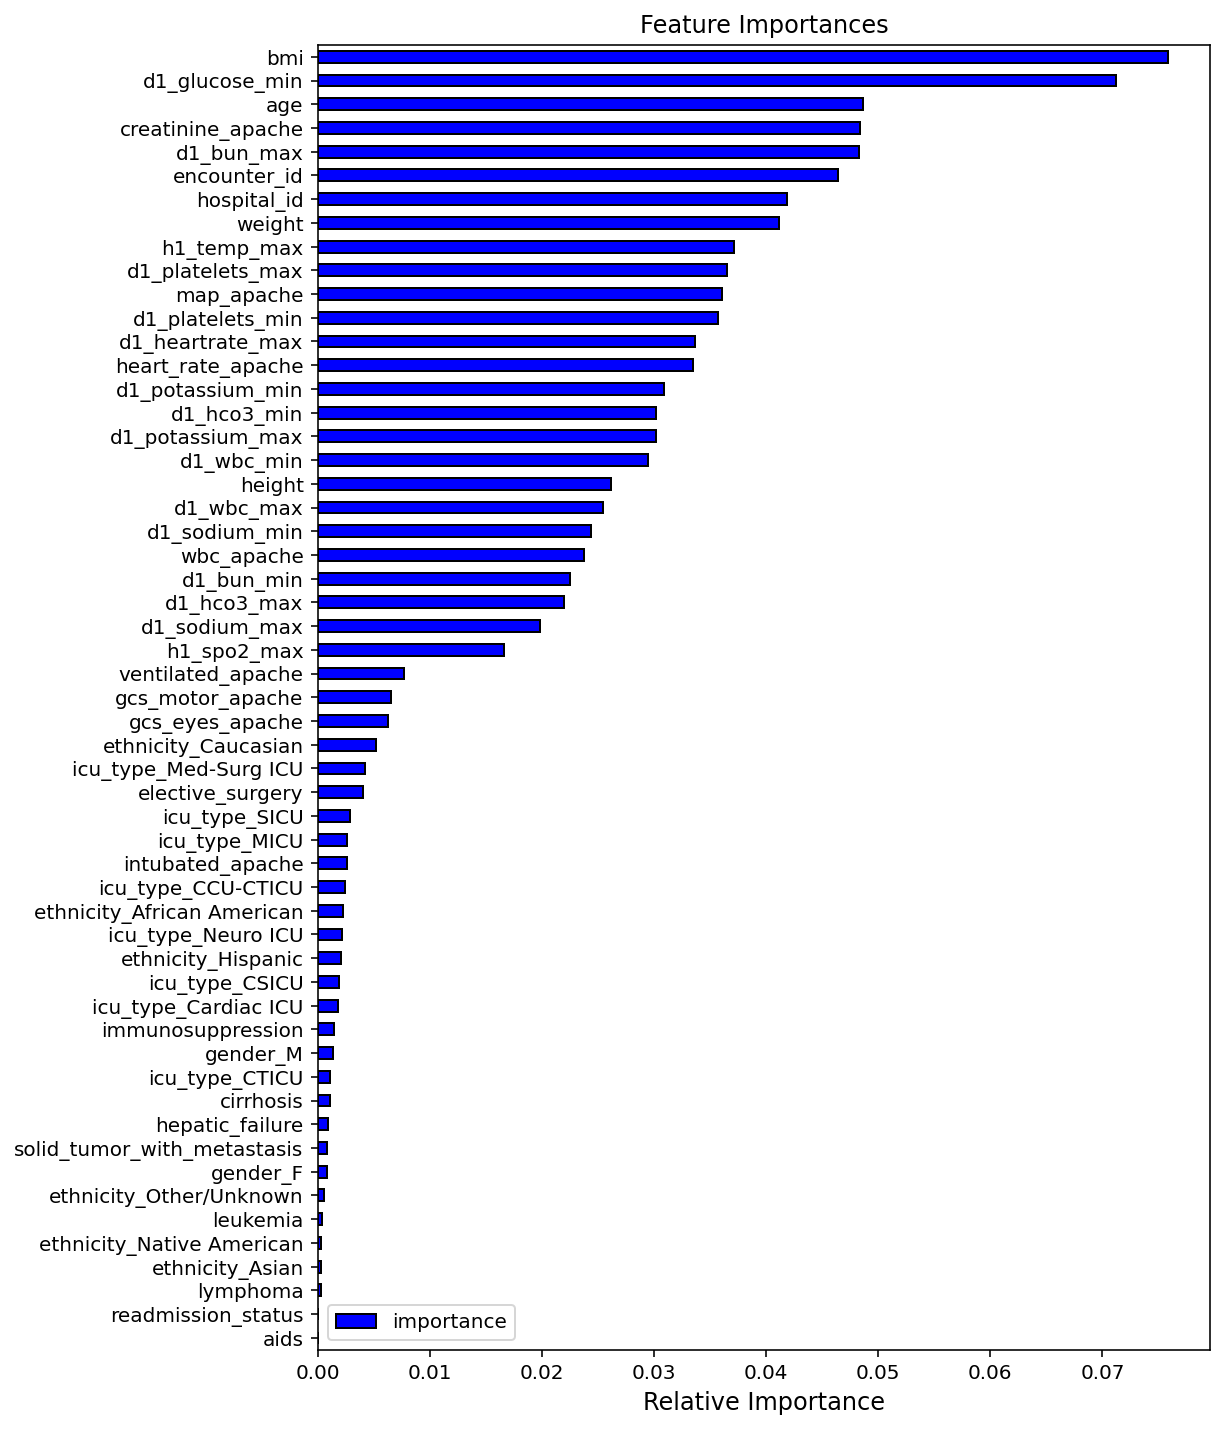

In [58]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0, criterion='entropy')

dtc.fit(features_encoded, target)

# TODO: Extract the feature importances using .feature_importances_ 
importances = dtc.feature_importances_

# Plot
vs.plot_feature_importance(features_encoded.columns, importances, (8, 12))

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_encoded, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=0,
                                                    stratify=target)

In [60]:
import classification_modeling as cm

naive_accuracy, naive_precision, naive_recall, naive_fscore = cm.calculate_naive_evaluation_mertics(target)

Naive Predictor: [Accuracy score: 0.3629, F-score: 0.4159]


GradientBoostingClassifier trained on 308 samples.
GradientBoostingClassifier trained on 3086 samples.
GradientBoostingClassifier trained on 30865 samples.
DecisionTreeClassifier trained on 308 samples.
DecisionTreeClassifier trained on 3086 samples.
DecisionTreeClassifier trained on 30865 samples.
RandomForestClassifier trained on 308 samples.
RandomForestClassifier trained on 3086 samples.
RandomForestClassifier trained on 30865 samples.


d:\github-repos\freelancer-com-diabetes-mellitus\visuals.py:130: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


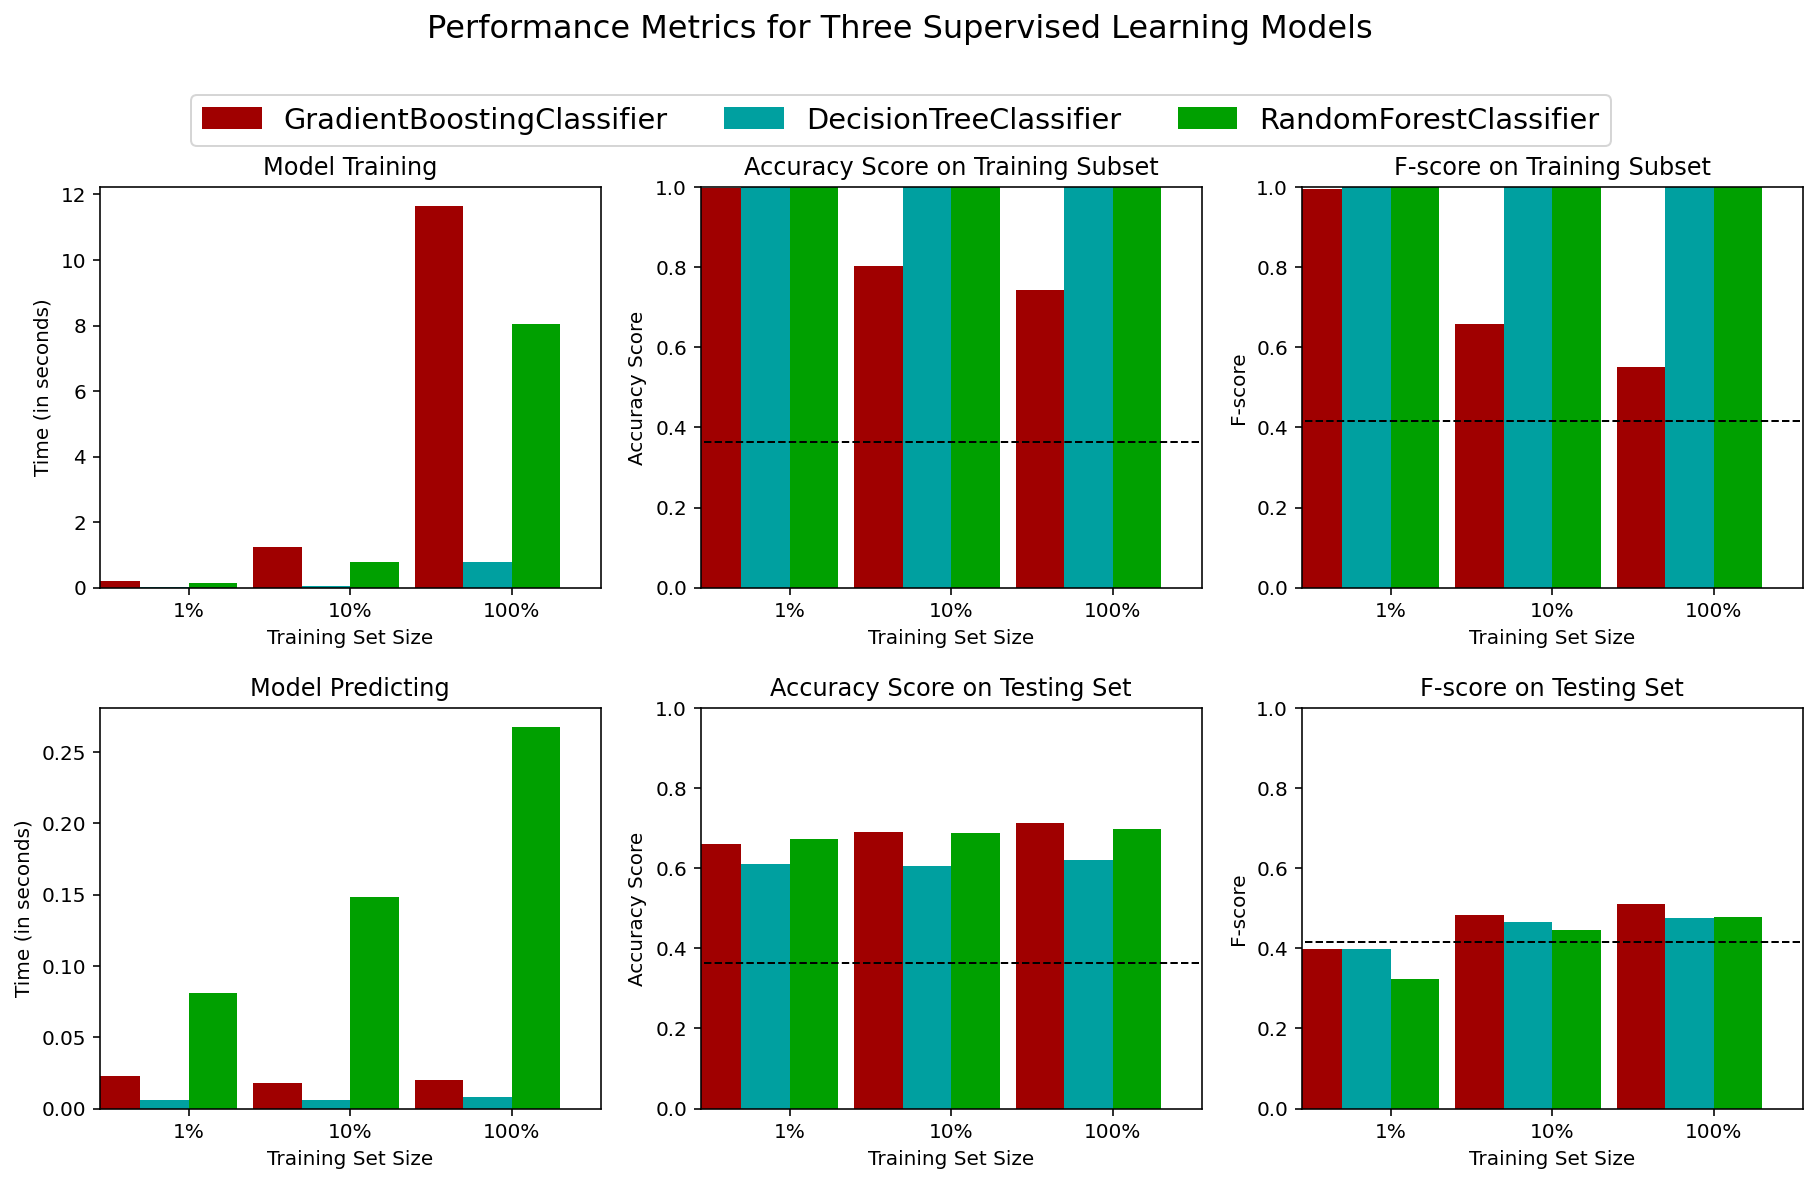

In [61]:
# TODO: Import the three supervised learning models from sklearn
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

# # TODO: Initialize the three models
clf_A = GradientBoostingClassifier(random_state=0)
clf_B = DecisionTreeClassifier(random_state=0)
clf_C = RandomForestClassifier(random_state=0)

models = [clf_A, clf_B, clf_C]

cm.train_and_compare_models(models, X_train, y_train, X_test, y_test, naive_accuracy, naive_fscore)

In [62]:
# TODO: Initialize the best unoptimized classifier
clf = GradientBoostingClassifier(random_state=0)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}

# Hyperparameters for GradientBoostingClassifier
parameters = {
        "n_estimators": [10, 100, 200],
        #"learning_rate": [0.01, 0.05, 0.1, 0.5, 1],
    }

# optimize the classifier
grid_obj = cm.optimize_model(clf, parameters, X_train, y_train, X_test, y_test)

best_clf = grid_obj.best_estimator_

best_clf

Unoptimized model
------
Accuracy score on testing data: 0.7121
F-score on testing data: 0.5939

Optimized Model
------
Final accuracy score on the testing data: 0.7162
Final F-score on the testing data: 0.6031


GradientBoostingClassifier(n_estimators=200, random_state=0)